In [2]:
# jupyter-notebook V0_1_1.ipynb --port 8888 --ip 192.168.1.5

import cv2
import numpy as np
from matplotlib import pyplot as plt
import itertools  
import time
import numba as nb
import copy
from components_container import ComponentsContainerWithHistory
import logging
logging.basicConfig(level=logging.INFO)

%matplotlib inline

In [3]:
def show_img(img):
    fig = plt.figure(figsize=(13, 13), dpi= 80, facecolor='w', edgecolor='k')
    plt.imshow(img[height_margin:height_margin+displayed_sq,width_margin:width_margin+displayed_sq], cmap="ocean")

In [4]:
displayed_sq = 1500
width_margin = 0
height_margin = 0

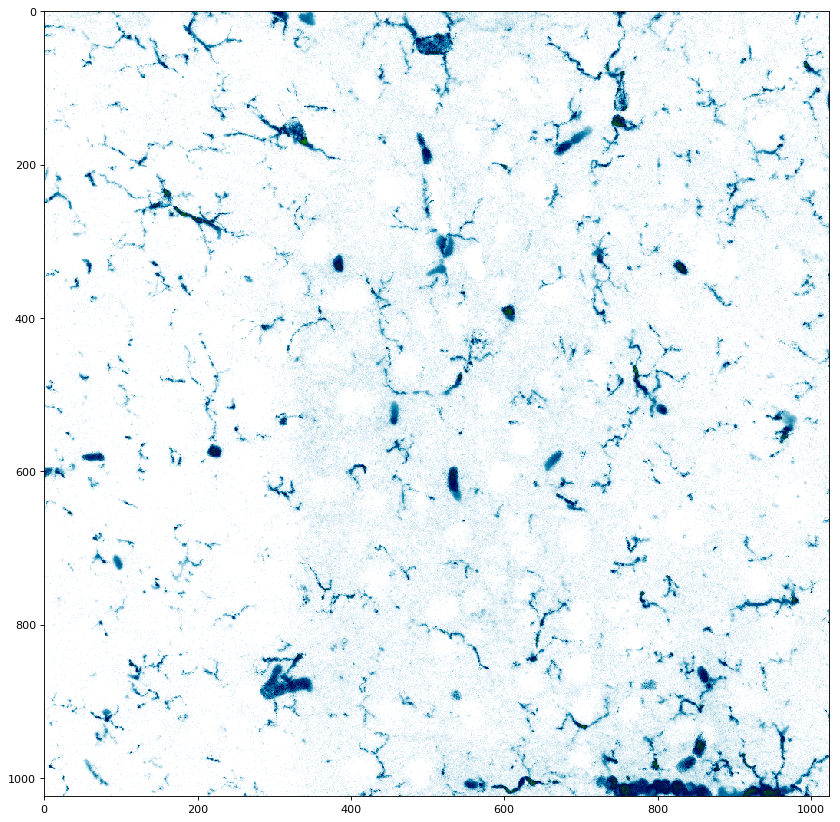

In [5]:
img = cv2.imread('../raw_pics/day4/int/36/36_int_iba_cortex_2z.bmp')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
invert = cv2.bitwise_not(gray)
show_img(invert)

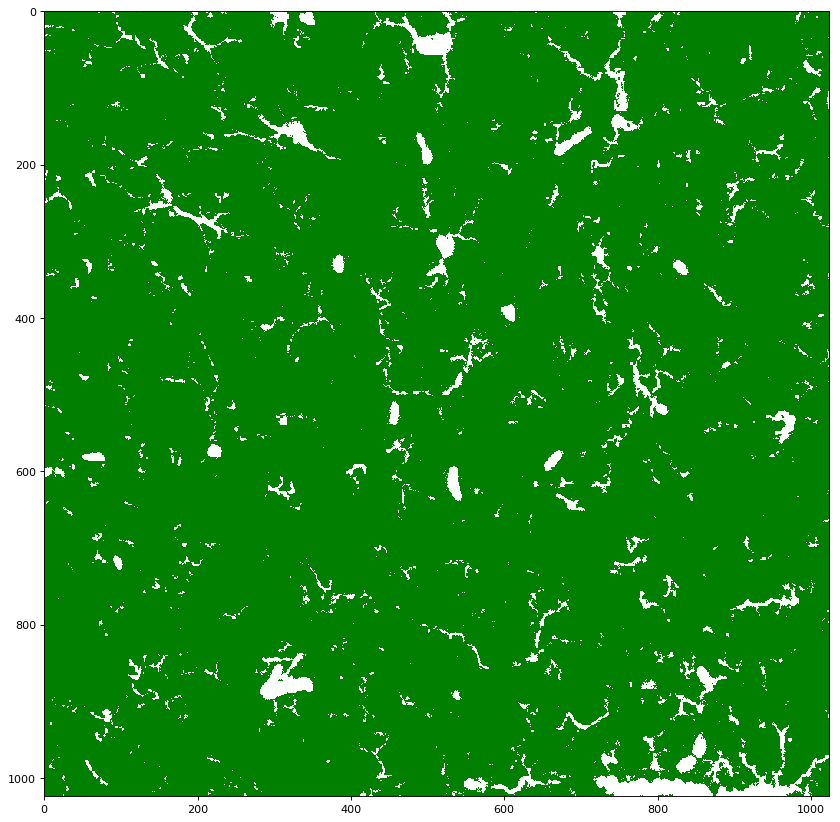

In [6]:
BACKGROUND_INTENSITY_THRESHOLD = 20

ret, binary = cv2.threshold(gray, BACKGROUND_INTENSITY_THRESHOLD, 400, cv2.THRESH_BINARY)
show_img(binary)

INFO:ComponentsContainerWithHistory:size prefiltering (separating big ones) took 0.01405191421508789 sec
INFO:ComponentsContainerWithHistory:size prefiltering (deleting small ones) took 0.11486387252807617 sec
INFO:ComponentsContainerWithHistory:adding edge info to components took 0.8837020397186279 sec


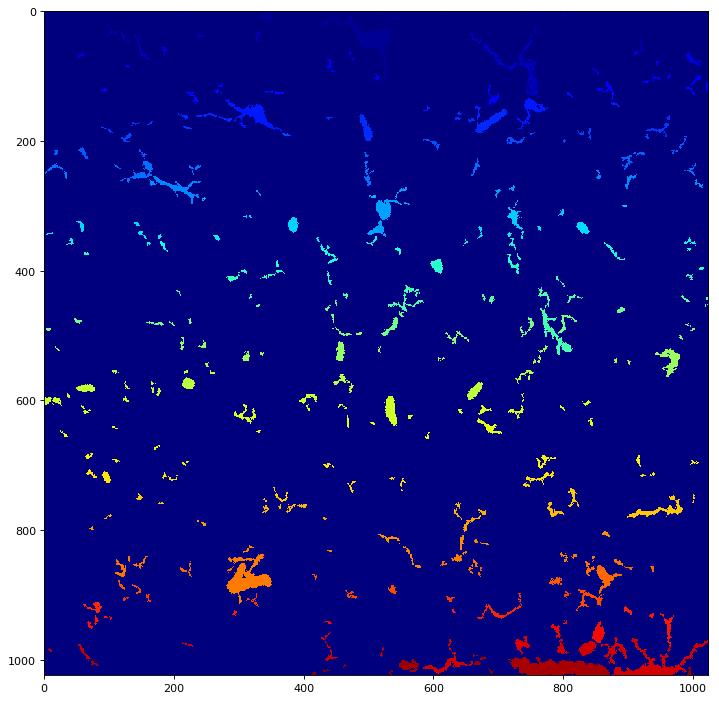

In [9]:
# filter all noise using minimum size threshold

MIN_AXON_SIZE = 20
container = ComponentsContainerWithHistory(binary, MIN_AXON_SIZE, logging.INFO)
container.show_components()

INFO:ComponentsContainerWithHistory:discarding previous components merge and axon-nucleus spliting
INFO:ComponentsContainerWithHistory:selecting all pairs to merge took 26.87915301322937 sec
INFO:ComponentsContainerWithHistory:merging took 0.39638614654541016 sec


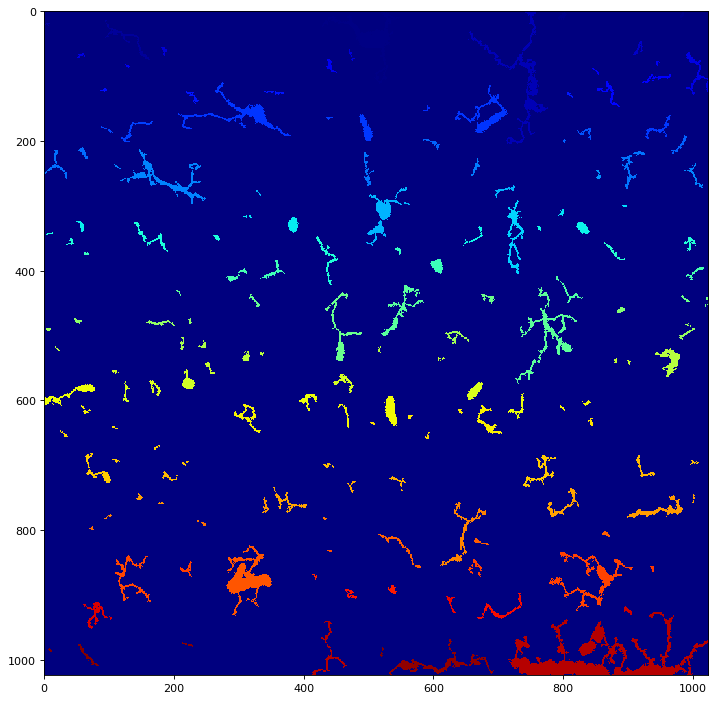

In [10]:
# merging close components based on centroids and contour distance

# for correct work please recompile from here if any of following paramethers changed

PREMERGE_CENTROIDS_DISTANCE_T  = 200
PREMERGE_CONTOUR_DISTANCE_T = 15

container.merge_components_closer_than(PREMERGE_CENTROIDS_DISTANCE_T, PREMERGE_CONTOUR_DISTANCE_T)
container.show_components()

INFO:ComponentsContainerWithHistory:discarding previous axon-nucleus spliting
INFO:ComponentsContainerWithHistory:splitting completted in 0.0010058879852294922, 
axons: 113, nucl: 54


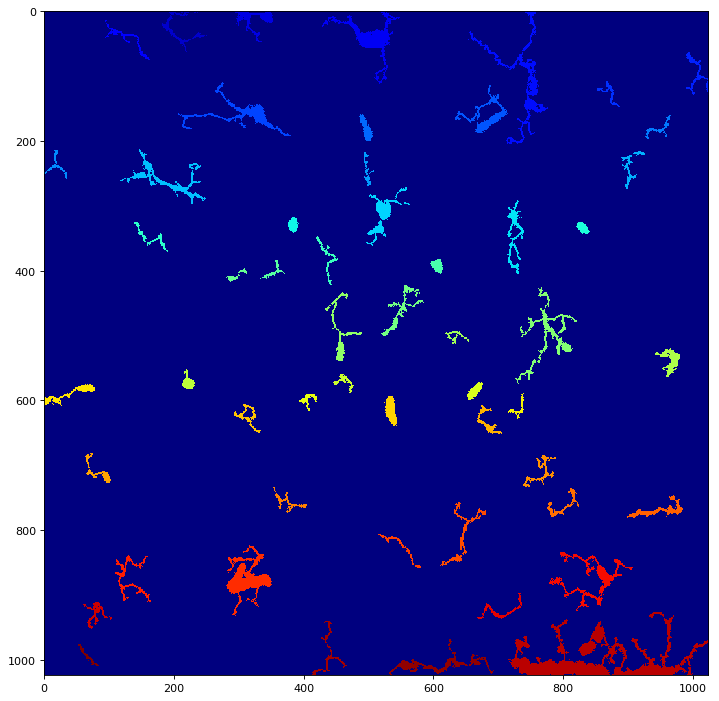

In [11]:
#splitting nucleus and axons based on size

MIN_NUCLEUS_SIZE = 150

container.split_nucl_axon(MIN_NUCLEUS_SIZE)
container.show_nucl_and_axons()

INFO:ComponentsContainerWithHistory:discarding previous axon to nucleus grouping
INFO:ComponentsContainerWithHistory:grouping ax to nucl took 2.700183868408203 sec
 axons with nucleus: 23


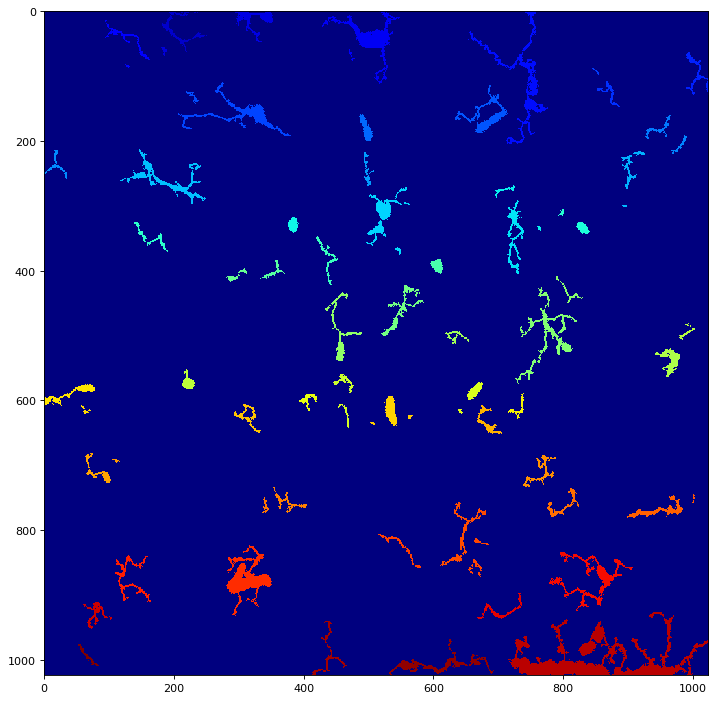

In [12]:
#grouping possible axons to nucleus

CENTROIDS_DISTANCE_T = 90
CONTOUR_DISTANCE_T = 25

container.group_axons_to_nucleus(CENTROIDS_DISTANCE_T, CONTOUR_DISTANCE_T)
container.show_nucl_and_axons()

Total nucleus: 38
#, Size, Perimeter, P/S
 1, 49889, 12153, 0.244
 2, 3847, 1055, 0.274
 3, 1646,  405, 0.246
 4, 1487,  631, 0.424
 5, 1156,  534, 0.462
 6,  995,  197, 0.198
 7,  937,  492, 0.525
 8,  930,  193, 0.208
 9,  850,  438, 0.515
10,  825,  230, 0.279
11,  710,  382, 0.538
12,  609,  136, 0.223
13,  534,  315, 0.59
14,  397,  247, 0.622
15,  374,  241, 0.644
16,  358,   99, 0.277
17,  354,  181, 0.511
18,  347,   85, 0.245
19,  333,  182, 0.547
20,  331,  200, 0.604
21,  328,  116, 0.354
22,  323,  182, 0.563
23,  301,   82, 0.272
24,  296,   66, 0.223
25,  292,   72, 0.247
26,  287,  153, 0.533
27,  277,  149, 0.538
28,  261,  139, 0.533
29,  257,  111, 0.432
30,  210,  126, 0.6
31,  203,  105, 0.517
32,  196,   97, 0.495
33,  195,  121, 0.621
34,  186,   74, 0.398
35,  182,  103, 0.566
36,  178,   97, 0.545
37,  173,   92, 0.532
38,  154,   74, 0.481


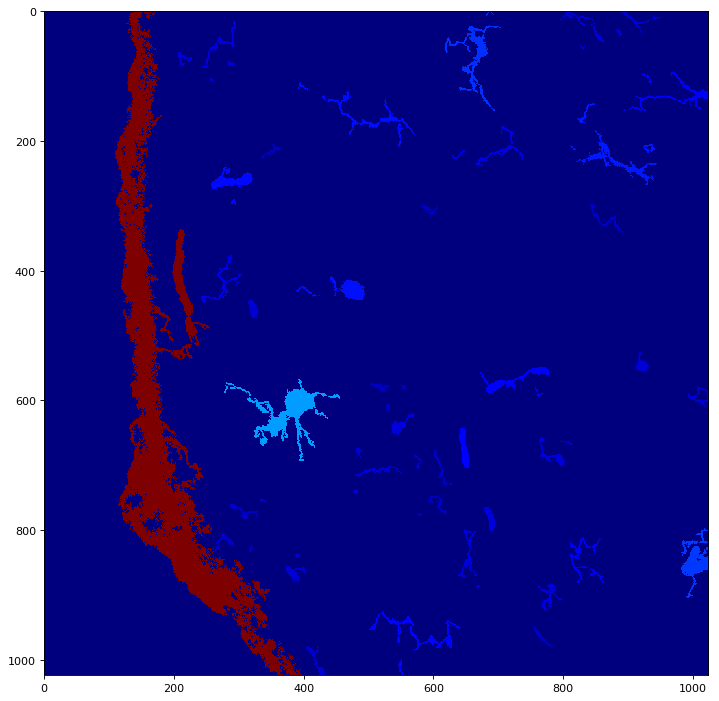

In [14]:
def print_info_from_container(container):
    labs = sorted(container.nucleus_labs, key = lambda x: -container.components_index.get(x).size)
    print("Total nucleus: {}".format(len(labs)))
    print("#, Size, Perimeter, P/S")
    i = 0
    for nucl_lab in labs:
        i +=1
        nucl = container.components_index.get(nucl_lab)
        print("{:2}, {:4}, {:4}, {:.3}".format(i, nucl.size, len(nucl.edge), len(nucl.edge)/nucl.size))
def draw_nucleus_from_container(container):
    labs = sorted(container.nucleus_labs, key = lambda x: -container.components_index.get(x).size)

    pic = np.zeros(container.markers.shape)
    nucl_color = 400
    axon_color = 409
    color_switch = 1
    switch_val = 40
    for nucl_lab in labs:
        pic[container.markers == nucl_lab] = np.sqrt(container.components_index.get(nucl_lab).size)
        for ax in container.components_index.get(nucl_lab).axons:
            pic[container.markers == ax.label] = np.sqrt(container.components_index.get(nucl_lab).size)

        nucl_color += color_switch * switch_val 
        axon_color += color_switch * switch_val
        color_switch *= 1

    
        
    fig = plt.figure(figsize=(11, 11), dpi=80, facecolor='w', edgecolor='k')
    
    plt.imshow(pic[height_margin:height_margin + displayed_sq, width_margin:width_margin + displayed_sq],
                   cmap="jet")
    
draw_nucleus_from_container(container)
print_info_from_container(container)

In [ ]:

# more ideas:
# search for axons form axons
# implement contour filtering of axons
# add intensity related features